In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
dt = pd.read_csv('../data/nam_processed_data.csv')
print(dt.head())

   bhk       type                              locality  area  price  \
0    3  Apartment   Lak And Hanware The Residency Tower   685   2.50   
1    2  Apartment     Radheya Sai Enclave Building No 2   640  52.51   
2    2  Apartment                         Romell Serene   610   1.73   
3    2  Apartment  Soundlines Codename Urban Rainforest   876  59.98   
4    2  Apartment                         Origin Oriana   659  94.11   

  price_unit          region              status  age  
0         Cr    Andheri West       Ready to move  New  
1          L    Naigaon East  Under Construction  New  
2         Cr   Borivali West  Under Construction  New  
3          L          Panvel  Under Construction  New  
4          L  Mira Road East  Under Construction  New  


In [10]:
# cnt=0
# for column in dt.columns[:3]:
#     value_counts = dt[column].value_counts()
#     print("Column:", column)
#     for value, count in value_counts.items():
#         if count < 10:
#             cnt+=1
#             print(f"Value: {value}, Count: {count}")
            
# print("cnt = " + str(cnt))

In [11]:
# rows_to_delete = []
# test=dt.copy()

# for column in test.columns[:3]:
#     value_counts = test[column].value_counts()
#     for value, count in value_counts.items():
#         if count < 10:
#             # Find indices where this value occurs and add them to rows_to_delete
#             rows_to_delete.extend(test.index[test[column] == value].tolist())

# print("Number of rows to be deleted:", len(rows_to_delete))
# # Drop the rows with indices stored in rows_to_delete
# test_cleaned = test.drop(index=rows_to_delete)

# # Verify the new DataFrame
# print(test_cleaned)

In [13]:
print(dt.shape)

(45343, 115)


In [22]:
print(dt.head())

   bhk  area  status  price_in_USD  house_type  new  region_Agripada  \
0    2   650       1      314400.0           0    0             True   
1    1   803       0      270000.0           0    0             True   
2    1   684       0      204000.0           0    0             True   
3    1   545       0      192000.0           0    0             True   
4    2  1650       0      420000.0           0    0             True   

   region_Airoli  region_Ambernath East  region_Ambernath West  ...  \
0          False                  False                  False  ...   
1          False                  False                  False  ...   
2          False                  False                  False  ...   
3          False                  False                  False  ...   
4          False                  False                  False  ...   

   region_Vangani  region_Vasai  region_Vashi  region_Vikhroli  \
0           False         False         False            False   
1       

In [14]:
X = dt.drop(['price_in_USD'], axis = 1)
Y = dt.price_in_USD


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y ,test_size = 0.2, random_state=10)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
model.score(X_test , Y_test)

0.8676008608004804

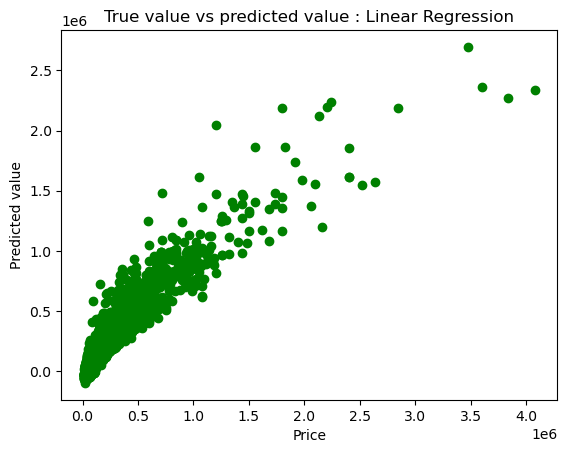

In [20]:
# Plotting Scatter graph to show the prediction 
# results - 'ytrue' value vs 'y_pred' value
plt.scatter(Y_test, Y_pred, c = 'green')
plt.xlabel("Price")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
print(cross_val_score(LinearRegression(), X, Y, cv=cv))

[0.85138469 0.84923593 0.8596343  0.86575118 0.86205979]


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# Print MAE and MSE
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 42297.961640893176
Mean Squared Error (MSE): 5516695647.040746


In [30]:
pred_table = pd.DataFrame(data={"actual value":Y_test, "predicted":model.predict(X_test)})
pred_table["difference"] = pred_table["actual value"] - pred_table["predicted"]
pred_table

,actual value,predicted,difference
24961,105912.0,175117.127082,-69205.127082
40922,75588.0,45172.836386,30415.163614
12323,40800.0,9790.115901,31009.884099
5755,442800.0,570487.690991,-127687.690991
15411,388800.0,543960.396843,-155160.396843
...,...,...,...
9629,264000.0,301295.090611,-37295.090611
7325,102000.0,100541.298421,1458.701579
1218,178800.0,136885.113681,41914.886319
31936,103200.0,129156.824794,-25956.824794
